Importing required modules

In [ ]:
#1-a-i
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading the csv file into a data frame

In [ ]:
df = pd.read_csv("/content/apartmentsNYC.csv")

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,77765.0,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73777,-73.95366,Hotel room,308,2,42,7/18/2022,0.30,30,217,4,NaN
1,2539.0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64529,-73.97238,Private room,0,30,9,10/19/2018,0.11,9,356,0,NaN
2,45910.0,Beautiful Queens Brownstone! - 5BR,204539,Mark,Queens,Ridgewood,40.70309,-73.89963,Entire home/apt,425,30,13,11/12/2019,0.10,6,365,0,NaN
3,45935.0,Room in Beautiful Townhouse.,204586,L,Bronx,Mott Haven,40.80635,-73.92201,Private room,60,30,0,NaN,NaN,1,83,0,NaN
4,45936.0,Couldn't Be Closer To Columbia Uni,867225,Rahul,Manhattan,Morningside Heights,40.80630,-73.95985,Private room,75,31,135,7/11/2022,0.95,1,219,4,NaN


In [ ]:
df.shape

(39881, 18)

In [ ]:
#We are checking for duplicate rows before dropping any columns to confirm that there are no duplicates
sum(df.duplicated())

0

We will drop the id, host name, name, and host id.
We removed the host name and name for privacy concerns and we removed the id and host id bcause they play no role in prediction, they are simply identifiers.

In [ ]:
df = df.drop(columns = ["id","host_name","name","host_id","last_review"])
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,Brooklyn,Greenpoint,40.73777,-73.95366,Hotel room,308,2,42,0.30,30,217,4,NaN
1,Brooklyn,Kensington,40.64529,-73.97238,Private room,0,30,9,0.11,9,356,0,NaN
2,Queens,Ridgewood,40.70309,-73.89963,Entire home/apt,425,30,13,0.10,6,365,0,NaN
3,Bronx,Mott Haven,40.80635,-73.92201,Private room,60,30,0,NaN,1,83,0,NaN
4,Manhattan,Morningside Heights,40.80630,-73.95985,Private room,75,31,135,0.95,1,219,4,NaN


In [ ]:
df.nunique()
#None of our columns contain only a single value

neighbourhood_group                   5
neighbourhood                       244
latitude                          21310
longitude                         18787
room_type                             5
price                              1045
minimum_nights                      130
number_of_reviews                   460
reviews_per_month                   890
calculated_host_listings_count       64
availability_365                    367
number_of_reviews_ltm               167
license                               5
dtype: int64

1 a i Developing the modules to identify missing data


Using the unique function for categorical data

In [ ]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Queens', 'Bronx', 'Manhattan', 'Staten Island'],
      dtype=object)

In [ ]:
#when we look at them in alphabetical order we can check if there any spelling mistakes and identify any missing values in the column
sorted(df['neighbourhood'].unique())

['Allerton',
 'Arden Heights',
 'Arrochar',
 'Arverne',
 'Astoria',
 'Bath Beach',
 'Battery Park City',
 'Bay Ridge',
 'Bay Terrace',
 'Baychester',
 'Bayside',
 'Bayswater',
 'Bedford-Stuyvesant',
 'Belle Harbor',
 'Bellerose',
 'Belmont',
 'Bensonhurst',
 'Bergen Beach',
 'Bloomfield',
 'Boerum Hill',
 'Borough Park',
 'Breezy Point',
 'Briarwood',
 'Brighton Beach',
 'Broad Channel',
 'Bronx Park',
 'Bronxdale',
 'Brooklyn Heights',
 'Brownsville',
 "Bull's Head",
 'Bushwick',
 'Cambria Heights',
 'Canarsie',
 'Carroll Gardens',
 'Castle Hill',
 'Castleton Corners',
 'Central Park',
 'Chelsea',
 'Chelsea, Staten Island',
 'Chinatown',
 'City Island',
 'Civic Center',
 'Claremont Village',
 'Clason Point',
 'Clifton',
 'Clinton Hill',
 'Co-op City',
 'Cobble Hill',
 'College Point',
 'Columbia St',
 'Concord',
 'Concourse',
 'Concourse Village',
 'Coney Island',
 'Corona',
 'Country Club',
 'Crotona Park',
 'Crown Heights',
 'Cypress Hills',
 'DUMBO',
 'Ditmars Steinway',
 'Dongan H

In [ ]:
df['room_type'].unique()
#we find white spaces: " " and mark them as NaN

array(['Hotel room', 'Private room', 'Entire home/apt', 'hotel room', nan,
       'Shared room'], dtype=object)

In [ ]:
df['license'].unique() 

array([nan, '41662/AL', 'STR21-00065', 'STR20-00021', 'STR22-049',
       'STR20-00053'], dtype=object)

Identifying missing data for numerical features

In [ ]:
df.dtypes
#confirming that all numerical values are actually of data type float/integer

neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [ ]:
#The range of values that latitude can take is from -90 to 90. If there are any values outside this range they may indicate missing data 
df["latitude"].describe()

count    39881.000000
mean        40.728870
std          0.058623
min         40.500314
25%         40.687760
50%         40.724545
75%         40.763200
max         40.928810
Name: latitude, dtype: float64

In [ ]:
#The range of values that longitude can take is from -180 to 180. If there are any values outside this range they may indicate missing data 
df["longitude"].describe()

count    39881.000000
mean       -73.945665
std          0.057870
min        -74.269520
25%        -73.983340
50%        -73.953710
75%        -73.925600
max        -73.690060
Name: longitude, dtype: float64

In [ ]:
df['price'].describe()

count    39881.000000
mean       194.849603
std        353.170870
min          0.000000
25%         77.000000
50%        130.000000
75%        215.000000
max      16500.000000
Name: price, dtype: float64

In [ ]:
#any values equal to zero will be considered missing data, so we mark them as NaN
df.loc[df['price'] == 0,'price'] = np.NaN

In [ ]:
df['minimum_nights'].describe()

count    39881.000000
mean        19.131742
std         31.432778
min          1.000000
25%          2.000000
50%         14.000000
75%         30.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [ ]:
#any values < zero will be considered missing data, so we mark them as NaN, if number of minimum nights is zero it means there are no restrictions on how long you need to rent for
df.loc[df['minimum_nights'] < 0,'minimum_nights'] = np.NaN

In [ ]:
df["number_of_reviews"].describe()
#if there are zero reviews it does not mean there is missing data it just means there are actually no reviews

count    39881.000000
mean        26.690855
std         56.256044
min          0.000000
25%          1.000000
50%          5.000000
75%         25.000000
max       1480.000000
Name: number_of_reviews, dtype: float64

In [ ]:
df['reviews_per_month'].describe() #describe
#range from 0 to just over 120 which implies there are no missing values

count    31519.000000
mean         1.244733
std          1.991702
min          0.010000
25%          0.140000
50%          0.560000
75%          1.790000
max        123.000000
Name: reviews_per_month, dtype: float64

In [ ]:
df['calculated_host_listings_count'].describe() 
#range from 0 to just over just below 500 which implies there are no issues

count    39881.000000
mean        16.931396
std         59.597136
min          1.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        453.000000
Name: calculated_host_listings_count, dtype: float64

In [ ]:
df["availability_365"].describe()

count    39881.000000
mean       131.411675
std        138.531669
min         -1.000000
25%          0.000000
50%         75.000000
75%        277.000000
max        365.000000
Name: availability_365, dtype: float64

In [ ]:
df.loc[df['availability_365'] < 0,'availability_365'] = np.NaN
#min and max are -1 and 365 respectively. -1 is missing data which will be marked as NaN

In [ ]:
df["number_of_reviews_ltm"].describe()
#there is no indication of values that could mean missing data

count    39881.000000
mean         7.754344
std         18.784149
min          0.000000
25%          0.000000
50%          1.000000
75%          7.000000
max        949.000000
Name: number_of_reviews_ltm, dtype: float64

1 a ii  
Developing the modules that identify outlier data

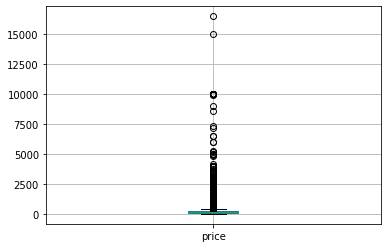

In [ ]:
#Outliers for price
df.boxplot(column = ["price"])

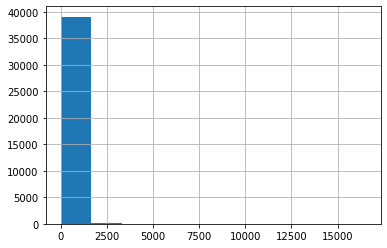

In [ ]:
df['price'].hist()

In [ ]:
#1bi- Seeing that the distribution is not gaussian we cannot use the standard deviation to identify outliers, we will use the interquartile range method
q25, q75 = np.percentile(df['price'].dropna(), 25), np.percentile(df['price'].dropna(), 75)
iqr = q75 - q25

# calculate the outlier cutoff
cut_off = iqr * 1.5  
lower, upper = q25 - cut_off, q75 + cut_off

# identify outliers
outliers = [x for x in df['price'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

outliers_removed = [x for x in df['price'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))
#mark them NaN



Identified outliers: 2757
Non-outlier observations: 36506


In [ ]:
#We are marking the outliers as NaN so they can be imputed later on
for index in range(df['price'].size):
  if df['price'][index] < lower or df['price'][index] > upper:
    df.loc[index,'price']= np.NaN
df['price'].isna().sum()

3375

lower bound is: 40.55300217317899
upper bound is: 40.904738069759766
Identified Outliers: 181
Non-Outlier Observations: 39700


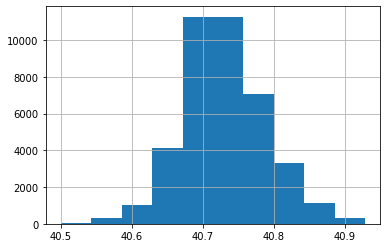

In [ ]:
df["latitude"].hist() 
#1bi- The latitude shows a gaussian distribution so we can use the mean and standard deviation to identify outliers
lat_mean, lat_std = np.mean(df['latitude']), np.std(df['latitude'])

# identify the cut off
cut_off = lat_std * 3

# upper and lower bounds
lower, upper = lat_mean - cut_off, lat_mean + cut_off
print('lower bound is: {}'.format(lower))
print('upper bound is: {}'.format(upper))

# outliers
outliers = [x for x in df['latitude'] if x < lower or x > upper] # notice here we used 'or'
non_outliers = [x for x in df['latitude'] if x >= lower and x <= upper] # notice here we used 'and'
print('Identified Outliers: {}'.format(len(outliers)))
print('Non-Outlier Observations: {}'.format(len(df) - len(outliers)))
#They have been identified as outliers but we do not have to treat them as such, these points could just be on the periphery but still part of New York

lower bound is: -74.1192733866953
upper bound is: -73.77205616614141
Identified Outliers: 1048
Non-Outlier Observations: 38833


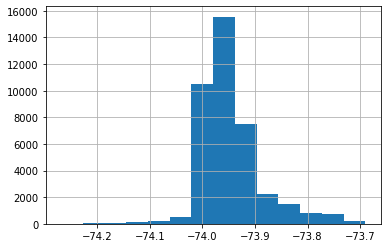

In [ ]:
df["longitude"].hist(bins=14) 

price_mean, price_std = np.mean(df['longitude']), np.std(df['longitude'])

# identifying the cut off
cut_off = price_std * 3

# upper and lower bounds
lower, upper = price_mean - cut_off, price_mean + cut_off
print('lower bound is: {}'.format(lower))
print('upper bound is: {}'.format(upper))

# outliers
outliers = [x for x in df['longitude'] if x < lower or x > upper] # notice here we used 'or'
non_outliers = [x for x in df['longitude'] if x >= lower and x <= upper] # notice here we used 'and'
print('Identified Outliers: {}'.format(len(outliers)))
print('Non-Outlier Observations: {}'.format(len(df) - len(outliers)))

#11bi-Similar to the latitude we use the standard deviaton because of the near gaussian distribution.There have been some outliers statistically identified however it would not be right to treat them as outliers
#just because they are far away from the mean it does not mean they should be imputed, the values are still valid and simply represent listings on the outskirts for example

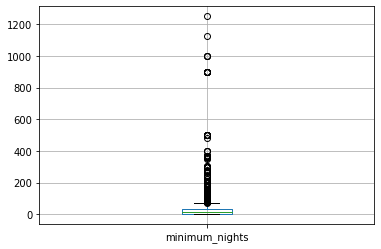

In [ ]:
df.boxplot(column = ["minimum_nights"]) 

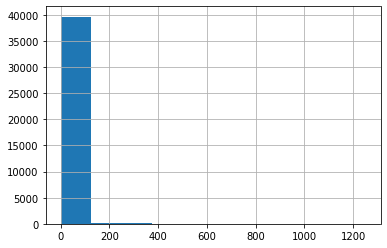

In [ ]:
df['minimum_nights'].hist()

In [ ]:
df['minimum_nights'].describe()

count    39881.000000
mean        19.131742
std         31.432778
min          1.000000
25%          2.000000
50%         14.000000
75%         30.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [ ]:
q25, q75 = np.percentile(df['minimum_nights'].dropna(), 25), np.percentile(df['minimum_nights'].dropna(), 75)
iqr = q75 - q25

# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

# identify outliers
outliers = [x for x in df['minimum_nights'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

outliers_removed = [x for x in df['minimum_nights'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))
#1bi- The distribution of the price is very clearly not gaussian so we must use the interquartile range to identify outliers
#If there is a number of values for price markedly higher, they may skew our models later on and need to be removed or imputed

Identified outliers: 868
Non-outlier observations: 39013


In [ ]:
#mark them NaN
for index in range(df['minimum_nights'].size):
  if df['minimum_nights'][index] < lower or df['minimum_nights'][index] > upper:
    df.loc[index,'minimum_nights']= np.NaN
df['minimum_nights'].isna().sum()

868

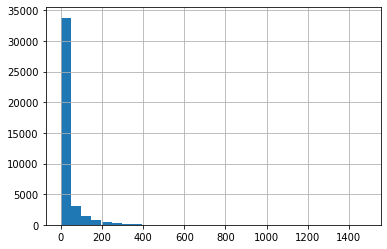

In [ ]:
df['number_of_reviews'].hist(bins=30)

In [ ]:
df['number_of_reviews'].describe()

count    39881.000000
mean        26.690855
std         56.256044
min          0.000000
25%          1.000000
50%          5.000000
75%         25.000000
max       1480.000000
Name: number_of_reviews, dtype: float64

In [ ]:

q25, q75 = np.percentile(df['number_of_reviews'], 25), np.percentile(df['number_of_reviews'], 75)
iqr = q75 - q25

# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

# identify outliers
outliers = [x for x in df['number_of_reviews'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

outliers_removed = [x for x in df['number_of_reviews'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))
#1bi- Again, the distribution is not gaussian so we will use the interquartile range. 
#It should be noted as well that such a large proportion are 0 and we can't identify them as outliers just because they have no reviews
#given the variety of properties listed and that some properties are older than others, it would be inaccurate to identify larger number of reviews as outliers

Identified outliers: 5038
Non-outlier observations: 34843


Identified outliers: 6033
Non-outlier observations: 33848


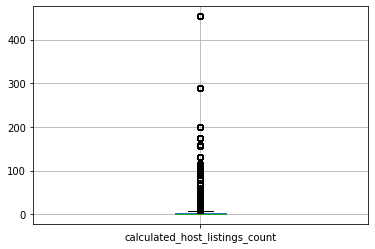

In [ ]:
df.boxplot(column = ["calculated_host_listings_count"])
q25, q75 = np.percentile(df['calculated_host_listings_count'], 25), np.percentile(df['calculated_host_listings_count'], 75)
iqr = q75 - q25

# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

# identify outliers
outliers = [x for x in df['calculated_host_listings_count'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

outliers_removed = [x for x in df['calculated_host_listings_count'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))
#1bi- distribution is not normal, must use interquartile range
#The calculated host listings count reflects how many other listings the owner has
#while it is true a value of over 400 may appear striking, imputing this data would be inaccurate. These values could be from real estate companies 
#and changing them would not allow us to compare how these companies perform compared to owners with much fewer listings

Identified outliers: 0
Non-outlier observations: 39843


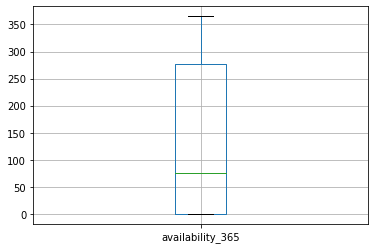

In [ ]:
df.boxplot(column = 'availability_365')
q25, q75 = np.percentile(df['availability_365'].dropna(), 25), np.percentile(df['availability_365'].dropna(), 75)
iqr = q75 - q25

# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

# identify outliers
outliers = [x for x in df['availability_365'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

outliers_removed = [x for x in df['availability_365'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))
#1bi- distribution not gaussian- IQR used for outliers
#no outliers detected which makes sense because all values are between 0 and 365. 0 cannot be an outlier because it just means the listing is fully booked. 
#365 means nobody has booked it which is just as a valid as fully booked

Identified outliers: 6080
Non-outlier observations: 33801


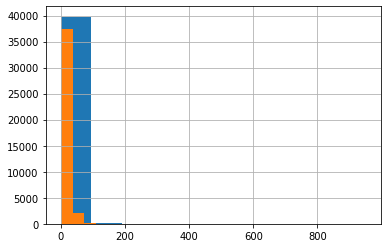

In [ ]:
df['number_of_reviews_ltm'].hist()
df['number_of_reviews_ltm'].hist(range= [0,365])

q25, q75 = np.percentile(df['number_of_reviews_ltm'], 25), np.percentile(df['number_of_reviews_ltm'], 75)
iqr = q75 - q25

# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

# identify outliers
outliers = [x for x in df['number_of_reviews_ltm'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

outliers_removed = [x for x in df['number_of_reviews_ltm'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))
#1bi- Distribution not normal- IQR for outliers
#Around 6000 points were identified as outliers which is over 15% of the values. This is too large of a number to be identified as outliers.

1aiii- Developing modules to identify anomalies

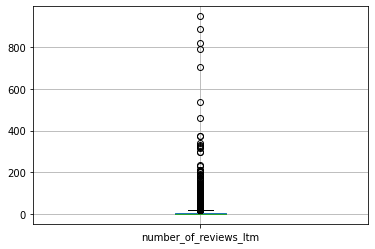

In [ ]:
#1bii-We felt that the number of reviews in the last twelve months had some anomalous data
#For example, for a property to have over 800 reviews in the last twelve months would require multiple people to leave a review every single day
#While this is not impossible, we felt it would be better to remove those with over 365 
df.boxplot(column = ['number_of_reviews_ltm'])

In [ ]:
l = []
for index in range(df['number_of_reviews_ltm'].size):
  if df['number_of_reviews_ltm'][index] > 365:
    l.append(index)
df = df.drop(labels = l, axis = 0)

In [ ]:
#1-a-iii
df['room_type'].unique()
df['room_type'] = df['room_type'].replace('hotel room','Hotel room')
#1bii-using the unique function we identified that some of labels for Hotel room were missing a capital letter

2a- Developing the modules to impute the data

In [ ]:
#First we will check how many missin values there are in every column
for col in df.columns:
    num = df[col].isna().sum()
    percentage = num / df.shape[0] * 100
    print('column {}: {}, {:.2f}%'.format(col, num, percentage))

column neighbourhood_group: 0, 0.00%
column neighbourhood: 0, 0.00%
column latitude: 0, 0.00%
column longitude: 0, 0.00%
column room_type: 825, 2.07%
column price: 3370, 8.45%
column minimum_nights: 868, 2.18%
column number_of_reviews: 0, 0.00%
column reviews_per_month: 8362, 20.97%
column calculated_host_listings_count: 0, 0.00%
column availability_365: 38, 0.10%
column number_of_reviews_ltm: 0, 0.00%
column license: 39867, 99.99%


In [ ]:
#The license column has an excessive amount of missing values- the best option is to remove the column entirely
df.drop(columns = ['license'])

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Brooklyn,Greenpoint,40.737770,-73.953660,Hotel room,308.0,2.0,42,0.30,30,217.0,4
1,Brooklyn,Kensington,40.645290,-73.972380,Private room,NaN,30.0,9,0.11,9,356.0,0
2,Queens,Ridgewood,40.703090,-73.899630,Entire home/apt,425.0,30.0,13,0.10,6,365.0,0
3,Bronx,Mott Haven,40.806350,-73.922010,Private room,60.0,30.0,0,NaN,1,83.0,0
4,Manhattan,Morningside Heights,40.806300,-73.959850,Private room,75.0,31.0,135,0.95,1,219.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39876,Manhattan,Ellis Island,40.718220,-74.037940,Entire home/apt,135.0,NaN,2,0.04,7,365.0,0
39877,Queens,Rosedale,40.647244,-73.720088,Entire home/apt,180.0,1.0,5,1.92,1,0.0,5
39878,Manhattan,Upper West Side,40.787320,-74.004470,Entire home/apt,240.0,5.0,18,2.87,1,152.0,18
39879,Brooklyn,Williamsburg,40.709192,-73.970121,Entire home/apt,400.0,30.0,0,NaN,1,311.0,0


In [ ]:
#2a
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent',missing_values = np.NaN)

# Split the data between input variables and target variable
X = np.array(df.loc[:, df.columns == 'room_type'])

print('X.shape: {}'.format(X.shape))

print('Missing - before imputation: {}'.format(sum(pd.isnull(X).flatten())))

# Apply imputation to the input variables (X)
X_trans = imputer.fit_transform(X)

# check for missing values after imputation
print('Missing - after imputation: {}'.format(sum(pd.isnull(X_trans).flatten())))

df['room_type'] = X_trans

#2b- the room_type column involves categorical data so there is no mean or median to impute with.
#An easy and efficient option is the mode. 
#Although statistical imputation may reduce variabliity, it is still a reasonable option and will not affect the most frequent occurence.

X.shape: (39872, 1)
Missing - before imputation: 825
Missing - after imputation: 0


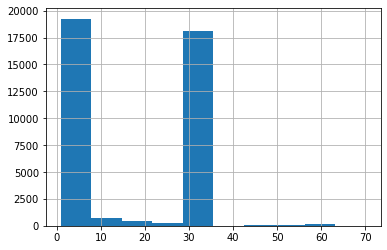

In [ ]:
df['minimum_nights'].hist()

In [ ]:
#2a
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median',missing_values = np.NaN)

# Split the data between input variables and target variable
X = np.array(df.loc[:, df.columns == 'minimum_nights'])

print('X.shape: {}'.format(X.shape))

print('Missing - before imputation: {}'.format(np.sum(np.isnan(X).flatten())))

# Apply imputation to the input variables (X)
X_trans = imputer.fit_transform(X)

# check for missing values after imputation
print('Missing - after imputation: {}'.format(np.sum(np.isnan(X_trans).flatten())))

df['minimum_nights'] = X_trans
#2b- The minimum nights column is numerical however the distribution is not gaussian at all. 
#Statistical imputation with the median would be most appropriate and would not majorly affect the central tendencies of the column

X.shape: (39872, 1)
Missing - before imputation: 868
Missing - after imputation: 0


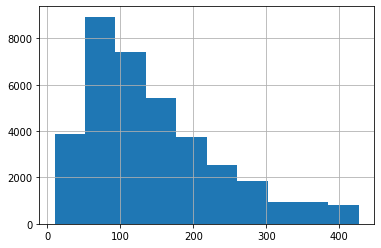

In [ ]:
df['price'].hist()

In [ ]:
#2a
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean',missing_values = np.NaN)

# Split the data between input variables and target variable
X = np.array(df.loc[:, df.columns == 'price'])

print('X.shape: {}'.format(X.shape))

print('Missing - before imputation: {}'.format(np.sum(np.isnan(X).flatten())))

# Apply imputation to the input variables (X)
X_trans = imputer.fit_transform(X)

# check for missing values after imputation
print('Missing - after imputation: {}'.format(np.sum(np.isnan(X_trans).flatten())))

df['price'] = X_trans
#2b- after removing the outliers, the price column shows a much more gaussian distribution which would make it appropriate to impute with the mean
#This would keep the central tendencies and dsitribution as they are 

X.shape: (39872, 1)
Missing - before imputation: 3370
Missing - after imputation: 0


In [ ]:
print(len(df[df['number_of_reviews'] == 0]))
print(sum(df['reviews_per_month'].isna()))
#everytime number of reviews is 0 the reviews per month is null
#there is no information to calculate the reviews per month so it has been left as blank but we feel it would be appropriate to put it as 0
#to indiciate the reviews per month is 0
df['reviews_per_month'] = df['reviews_per_month'].replace(np.NaN,0)

8362
8362


In [ ]:
df = df.dropna(subset = ['availability_365'])
#the number of missing values in the availability is minimal so removing these rows is not an issue

In [ ]:
df.to_csv('/content/apartmentsNYC_Clean.csv')

6a- Developing modules to engineer the columns

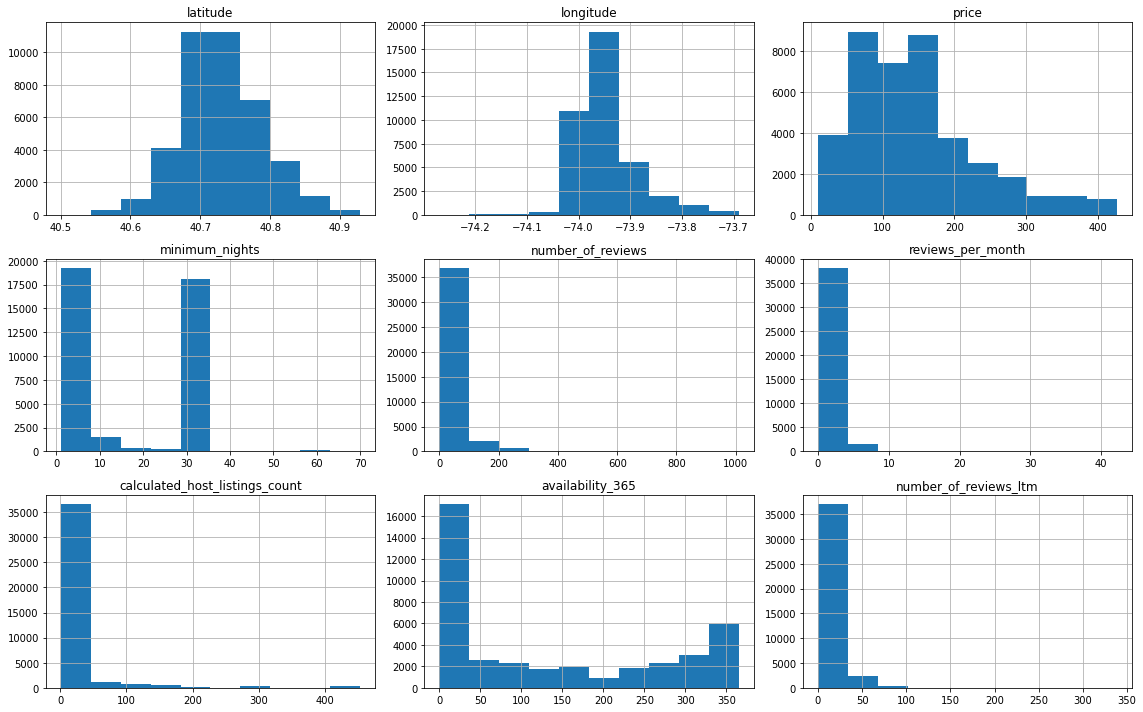

In [ ]:
df = pd.read_csv('/content/apartmentsNYC_Clean.csv')
df.head()
df_num = df[['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']]
fig = df_num.hist()
fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.tight_layout()
#6b- Splitting the mumerical and categorical variables and then plotting histograms of the numerical variables 
#to see their distribution


6b- We chose to scale our numerical columns because we will be applying a transform later on so the scaling may help the transform and we will also be running feature selection and clustering algorithms and the scales of the columns vastly differ which would interfere negatively with the performance of the algorithms

In [ ]:
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()
df[['latitude']]=sscaler.fit_transform(df[['latitude']])
df[['longitude']]=sscaler.fit_transform(df[['longitude']])
df[['price']]=sscaler.fit_transform(df[['price']])
#6b- The longitude, latitude and price all show a distribution close to gaussian 
#so it would be appropriate to use standardized scaling using the mean and standard deviation

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
df[['minimum_nights']]=mmscaler.fit_transform(df[['minimum_nights']])
df[['number_of_reviews']]=mmscaler.fit_transform(df[['number_of_reviews']])
df[['calculated_host_listings_count']]=mmscaler.fit_transform(df[['calculated_host_listings_count']])
df[['number_of_reviews_ltm']]=mmscaler.fit_transform(df[['number_of_reviews_ltm']])
df[['availability_365']]=mmscaler.fit_transform(df[['availability_365']])
df[['reviews_per_month']]=mmscaler.fit_transform(df[['reviews_per_month']])
#6b-The rest of the numerical columns all show a distribution far from gaussian so they would require min max scaling


In [ ]:
df.head()

,Unnamed: 0,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,0,Brooklyn,Greenpoint,0.151685,-0.138572,Hotel room,1.878823,0.014493,0.041584,0.007099,0.064159,0.594521,0.011799,NaN
1,1,Brooklyn,Kensington,-1.425460,-0.462081,Private room,0.000085,0.420290,0.008911,0.002603,0.017699,0.975342,0.000000,NaN
2,2,Queens,Ridgewood,-0.439744,0.795145,Entire home/apt,3.235439,0.420290,0.012871,0.002366,0.011062,1.000000,0.000000,NaN
3,3,Bronx,Mott Haven,1.321243,0.408386,Private room,-0.996739,0.420290,0.000000,0.000000,0.000000,0.227397,0.000000,NaN
4,4,Manhattan,Morningside Heights,1.320390,-0.245544,Private room,-0.822814,0.434783,0.133663,0.022480,0.000000,0.600000,0.011799,NaN


In [ ]:
df_num = df[['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']]

from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline(steps=[('yeo-johnson', PowerTransformer(method='yeo-johnson'))])

X_trans = pipe.fit_transform(df_num)

X_trans_df = pd.DataFrame(X_trans, columns=df_num.columns)
#6b- after scaling all te numrical columns we decided to apply a power transform to make the distribution of the variables more gaussian
#we applied a yeo-johnson transformation because it permits negative numbers, which are abundant in our dataset
#and we did not want to apply a scaler again to remove the negatives. 
#The more gaussian distribution following the transform will lead to improved performance in the machine learning algorithms later on

In [ ]:
for col in X_trans_df.columns:
  df[col] = X_trans_df[col]

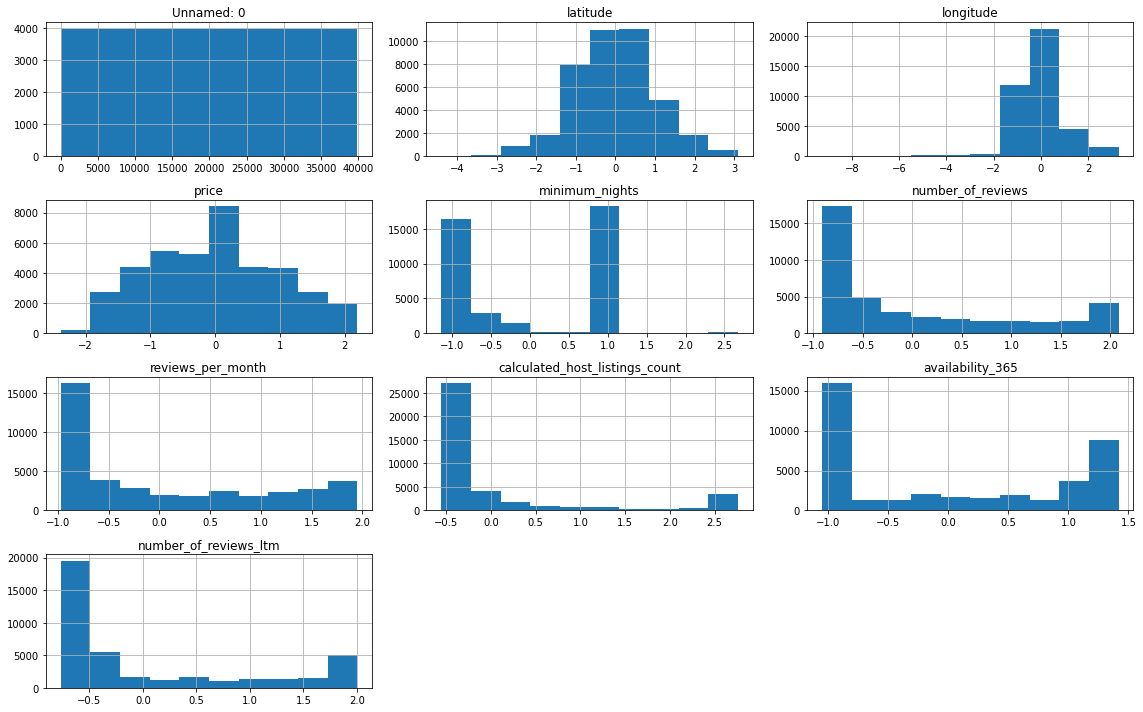

In [ ]:
fig = df.hist()
fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.tight_layout()

6b- For the categorical variables, we chose to encode them with OneHotEncoding so they could be represented numerically. We needed to encode them because the algorithms we would be running later such as kmeans cannot operate on categorical data

In [ ]:
df_ohe = df.copy()
one_hot_1 = pd.get_dummies(df_ohe,prefix = 'neigh_group' ,columns=['neighbourhood_group'],drop_first=False)
one_hot_1.insert(loc=2, column='neighbourhood_group', value=df.neighbourhood_group.values)
df = one_hot_1

In [ ]:
df_ohe = df.copy()
one_hot_1 = pd.get_dummies(df_ohe,prefix = 'room_type' ,columns=['room_type'],drop_first=False)
one_hot_1.insert(loc=2, column='room_type', value=df.room_type.values)
df = one_hot_1

In [ ]:
df_ohe = df.copy()
one_hot_1 = pd.get_dummies(df_ohe,prefix = 'neighbourhood' ,columns=['neighbourhood'],drop_first=False)
one_hot_1.insert(loc=2, column='neighbourhood', value=df.neighbourhood.values)
df = one_hot_1

In [ ]:
df = df.drop(columns = ["neighbourhood","room_type","neighbourhood_group","license"])

KeyError: ignored

7- Implementing two feature selection algorithms
We chose availability_365 as our target variable as a reflection of how booked each property is. In this way, our feature selection will be picking the variables that provide the most information on the availability. 

In [ ]:
# Split the data into X and y
X = df.loc[:, df.columns != 'availability_365']
y = df.loc[:, df.columns == 'availability_365']
print(X.shape)
print(y.shape)

(39834, 261)
(39834, 1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(31867, 261)
(31867, 1)
(7967, 261)
(7967, 1)


In [ ]:
#Implementing recursive feature elimination
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE

NUM_FEATURES_RFE = 8
model = DecisionTreeRegressor()
feature_names = [col for col in df.columns if col != 'availability_365']

In [ ]:
selector = RFE(estimator=model, n_features_to_select=NUM_FEATURES_RFE)
fit = selector.fit(X_train, y_train)

# Getting Feature rankings and names and selected features
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
selected = []
for i in range(len(fit.support_)):
    if fit.support_[i]:
        selected.append(feature_names[i])
print('Selected Features: ', selected)

Num Features: 8
Selected Features: [ True  True  True  True  True  True  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False Fal

8. The recursive feature elimination algorithm gave us the top 8 columns as latitude, longitude, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, number_of_reviews_ltm. The latitude and longitude being important makes a lot of sense- these are proxies for the neighborhood group and neighborhood and is in line with what the EDA told us on the way the price can vary significantly across areas but a clear trend can be identified. The price being important is also very logical, the demand changes with the price and this is reflected in the EDA. The number of reviews being important is not so clear and maybe if we had an indication of how positive or negative the reviews were it would be of more help.

The random forest regressor showed similar importance with the latitude and longitude again having very high scores. The calculated host listings count being given a high score in this algorithm may appear peculiar but when we think about the way those with higher listings coudbe forming a monopoly and influencing consumers decisions more significantly through marketing it makes sense. 

The encoded categorical variables did not show high importance in either algorithm and this is to be expected because of the way they were encoded (they only have 0's and 1's) and because there are so many of them. Some columns did show more importance than other but it was minute compared to the numerical variables

In [ ]:
#Implementing random forest feature importance- regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

importances = model.feature_importances_.flatten()
for i, v in enumerate(importances):
    print('Feature: {}, Score: {:.5f}'.format(feature_names[i], v))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Feature: latitude, Score: 0.10773
Feature: longitude, Score: 0.11690
Feature: price, Score: 0.09970
Feature: minimum_nights, Score: 0.06819
Feature: number_of_reviews, Score: 0.06002
Feature: reviews_per_month, Score: 0.07050
Feature: calculated_host_listings_count, Score: 0.17486
Feature: number_of_reviews_ltm, Score: 0.18398
Feature: neigh_group_Bronx, Score: 0.00099
Feature: neigh_group_Brooklyn, Score: 0.00183
Feature: neigh_group_Manhattan, Score: 0.00177
Feature: neigh_group_Queens, Score: 0.00156
Feature: neigh_group_Staten Island, Score: 0.00018
Feature: room_type_Entire home/apt, Score: 0.00632
Feature: room_type_Hotel room, Score: 0.00083
Feature: room_type_Private room, Score: 0.00729
Feature: room_type_Shared room, Score: 0.00157
Feature: neighbourhood_Allerton, Score: 0.00012
Feature: neighbourhood_Arden Heights, Score: 0.00002
Feature: neighbourhood_Arrochar, Score: 0.00007
Feature: neighbourhood_Arverne, Score: 0.00051
Feature: neighbourhood_Astoria, Score: 0.00121
Featu

9. KMeans clustering
a. The most appropriate distance measure for our engineered dataset would be Gower's distance because our data type is mixed between the continuous numerical variables and the disscrete encoded categorical variables. However, using the algorithm on python means we are unable to choose which distance metric is being used and Euclidean distance is used by default. The Euclidean distance functions very well with the numerical columns so it is not completely inaccurate, especially when considering the fact that those same columns were the ones that were shown to be most important by the feature selection algorithmss.

b. KMeans clustering requires scaling becuase it calculates distance. This means if the scale of one column is 10^3 and the other has a scale of 10^-3 the column with the larger scale will have more of an effect on the distance that is calculated and would negate the effect of the other column. This is why everything must be scaled before using the algorithm, and all our numerical values have been scaled in the feature enginerring stage so this has already been addressed. 


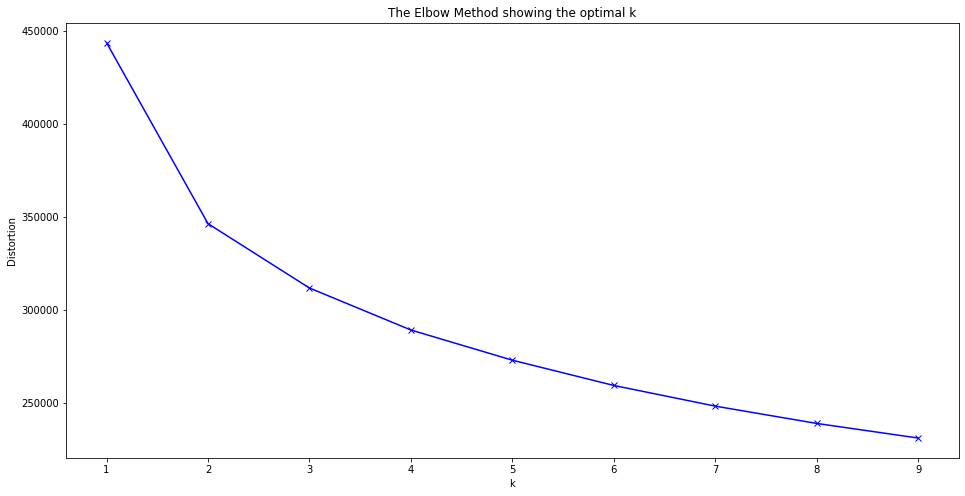

In [ ]:
from sklearn.cluster import KMeans

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(df)
centroids  = kmeanModel.cluster_centers_

In [ ]:
pd.DataFrame(centroids, columns = df.columns)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neigh_group_Bronx,...,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside
0,0.272501,-0.271864,0.100112,0.455817,-0.662669,-0.621301,2.337946,0.616871,-0.496047,0.007348,...,1.626303e-19,2.114194e-18,6.570265e-17,0.011757,1.626303e-19,-7.806256e-18,3.946496e-17,4.092863e-18,1.626303e-19,0.042410
1,-0.099560,0.217586,0.180250,-0.881844,0.991848,1.253417,-0.159158,0.449438,1.281469,0.063465,...,8.084728e-05,7.276255e-04,2.263724e-03,0.049398,8.084728e-05,3.233891e-03,3.718975e-03,3.233891e-04,8.084728e-05,0.005013
2,0.724289,-0.340151,0.155991,0.412843,-0.414147,-0.565778,-0.411664,-0.396759,-0.598862,0.067176,...,-2.212450e-18,3.597122e-04,3.776978e-03,0.002068,-2.212450e-18,1.981922e-16,-2.402592e-16,2.697842e-04,-2.212450e-18,0.000989
3,-0.701136,0.206013,-0.383438,0.357940,-0.389100,-0.539872,-0.396245,-0.352728,-0.589577,0.000086,...,-2.422514e-18,-2.873136e-18,1.155760e-16,0.152133,-2.422514e-18,6.389225e-03,3.367294e-03,9.920450e-18,-2.422514e-18,0.005267


9d. The elbow method identified 4 clusters as the optimum number. 
The first cluster has the largest minimum_nights and the largest calculated host listing count. It also has the lowest number of reviews and reviews per month and the highest availability. In summary: extended stays where the tenants seldom leave reviews but the owners have a lot of other propertoes.

The second cluster has the highest number of reviews, reviews per month and revoews in the last twelve months but the lowest number of minimum nights. These are short stays where the tenants leave frequent reviews.

The third cluster is characterized by the lowest host listing count, lowest availability and lowest number of reviews in last twelve months. The minimum nights is significantly high though. These are long stays, with few reviews and the owner does not have many other listings. 

The last cluster is the cheapest and the hosts have few other listings. They are pretty well booked but do not receive many reviews. These stays are longer than average but much cheaper and quite popular.

e. From a practical perspective the first cluster makes a lot of sense. These are most likely real estate companies providing long term contracts with lower prices where the tenants are unlikely to leave reviews frequently because of the extended stay and nature of the contract.

The second cluster also makes sense, these are the short stays where people will likely leave more reviews because of the high turnover and they tend to be more expensive, similar to hotel rooms except the host listing counts are low so they are unlikely to actually be hotels.

The third cluster is not as clear, it is like the first cluster involving long term contracts except this time the host listing count is much lower and the prices are higher. These could be the higher end apartments that cost more despite the extended contracts.

The last cluster appears to be the average Airbnb. Cheaper than all other clusters but the minimum nights are above average and the owner has few other listings. Most likely the vacation homes being rented out for 30 days but at much cheaper prices which reflects what Airbnbs are used for most frequently. 


In [ ]:
9f
from sklearn.cluster import KMeans
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(df)
centroids  = kmeanModel.cluster_centers_
#For our business perspective we chose 5 clusters. 
#These would be roughly 
#1- the extended contracts from real estate companies
#2- the exented contracts from regular home owners
#3- short and frequent stays from regular home owners
#4- Average airbnb listing, longer than a few days but still cheap 
#5- Miscelanneous listings such as luxurious apartments or hotel rooms

In [ ]:
pd.DataFrame(centroids, columns = df.columns)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neigh_group_Bronx,...,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside
0,0.288472,-0.314400,0.099286,0.519721,-0.665917,-0.640239,2.366528,0.604735,-0.503457,0.006110,...,1.592422e-19,4.391019e-18,6.266689e-17,0.009383,1.592422e-19,0.000436,3.859760e-17,3.876023e-18,1.592422e-19,0.041894
1,0.147600,-0.521040,0.641201,0.407523,-0.394860,-0.553079,-0.445730,-0.474808,-0.571938,0.006179,...,-1.511107e-18,-1.425726e-17,1.961554e-04,0.077285,-1.511107e-18,0.003825,1.961554e-04,9.807768e-05,-1.511107e-18,0.000588
2,-0.118039,0.043965,0.210460,-0.875540,1.247670,1.329031,-0.144785,0.336384,1.483827,0.047164,...,1.005632e-04,5.028158e-04,1.910700e-03,0.050181,1.005632e-04,0.003821,3.318584e-03,3.016895e-04,1.005632e-04,0.004123
3,-0.066765,0.814075,-0.095090,-0.635969,-0.312976,0.167736,-0.181165,0.898148,-0.096914,0.116348,...,1.626303e-19,7.777259e-04,5.755172e-03,0.038264,1.626303e-19,0.001555,5.132991e-03,4.666356e-04,1.626303e-19,0.006844
4,-0.140979,0.124689,-0.976064,0.720805,-0.382033,-0.658931,-0.425788,-0.811974,-0.690312,0.029947,...,-2.663072e-18,3.455425e-04,1.382170e-03,0.100898,-2.663072e-18,0.002880,1.958074e-03,8.212831e-18,-2.663072e-18,0.006105


9g
The first cluster involves long stays, a very large amount of host listings and very infrequent reviews.
The second cluster is the most expensive, but very frequently booked and few reviews. 
The third cluster has the smallest minimum nights as well as the most numerous and most frequent reviews.
The forth cluster has short stays the highest availability, average price.
The last cluster is the cheapest, has the longest stay and significantly lower host listings as well as infrequent reviews but the lowest availability too. 

9h
The first cluster makes sense and appears to clearly be the listings from real estate compnies which involve exended rental contracts and signiicantly higher host listingg counts
The second cluster is not very well defined. The minimum nights indicates it involves longer stays but the price is too high for it to be in regular homes. These could be the luxurious apartments we identified as part of the 5 clusters from a business perspective. 
The third cluster involves very short stays and very frequent and numerous reviews. These are the short stays that are more expensive than the longer ones and makes sense, especially with the reviews and the likely number of different tenants.
The fourth cluster is difficult to delineate. It has a very high availability but the price is near average. It seems these are the listings that are not performing well and they have been clustered together
The last cluster probably represents home owners who have other houses and are renting out their houses in New York. This makes sense with respect to our identified business clusters, the extended contracts not from real estate companies.